In [16]:
import comet_ml

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [17]:
with open('app/api_token.txt') as f:
    api_token = f.read()

api = comet_ml.api.API(api_token)

In [18]:
all_experiments = api.get('nokiroki1', 'tr2vec-diploma')

In [21]:
res_train = []
res_val = []

for experiment in all_experiments:
    metrics_train = experiment.get_metrics('train_loss')
    metrics_val = experiment.get_metrics('val_loss')
    exp_res_train = np.zeros((len(metrics_train), 2), dtype=np.float32)
    exp_res_val = np.zeros((len(metrics_val), 2), dtype=np.float32)

    for i, metric in enumerate(metrics_train):
        exp_res_train[i] = (metric['step'], metric['metricValue'])
    for i, metric in enumerate(metrics_val):
        exp_res_val[i] = (metric['step'], metric['metricValue'])
    
    res_train.append(exp_res_train)
    res_val.append(exp_res_val)


In [64]:
train_len_min = min(res_train, key=lambda x: x.shape[0]).shape[0]
val_len_min = min(res_val, key=lambda x: x.shape[0]).shape[0]

In [65]:
for i, res in enumerate(res_train):
    res_train[i] = res[:train_len_min]
for i, res in enumerate(res_val):
    res_val[i] = res[:val_len_min]

In [66]:
res_train = np.stack(res_train, 0)
res_val = np.stack(res_val, 0)

In [67]:
res_train_means = res_train[:, :, 1].mean(axis=0)
res_train_stds = res_train[:, :, 1].std(axis=0)

res_train_upper_bounder = res_train_means + 1.96 * (res_train_stds / np.sqrt(res_train.shape[0]))
res_train_lower_bounder = res_train_means - 1.96 * (res_train_stds / np.sqrt(res_train.shape[0]))


res_val_means = res_val[:, :, 1].mean(axis=0)
res_val_stds = res_val[:, :, 1].std(axis=0)

res_val_upper_bounder = res_val_means + 1.96 * (res_val_stds / np.sqrt(res_val.shape[0]))
res_val_lower_bounder = res_val_means - 1.96 * (res_val_stds / np.sqrt(res_val.shape[0]))

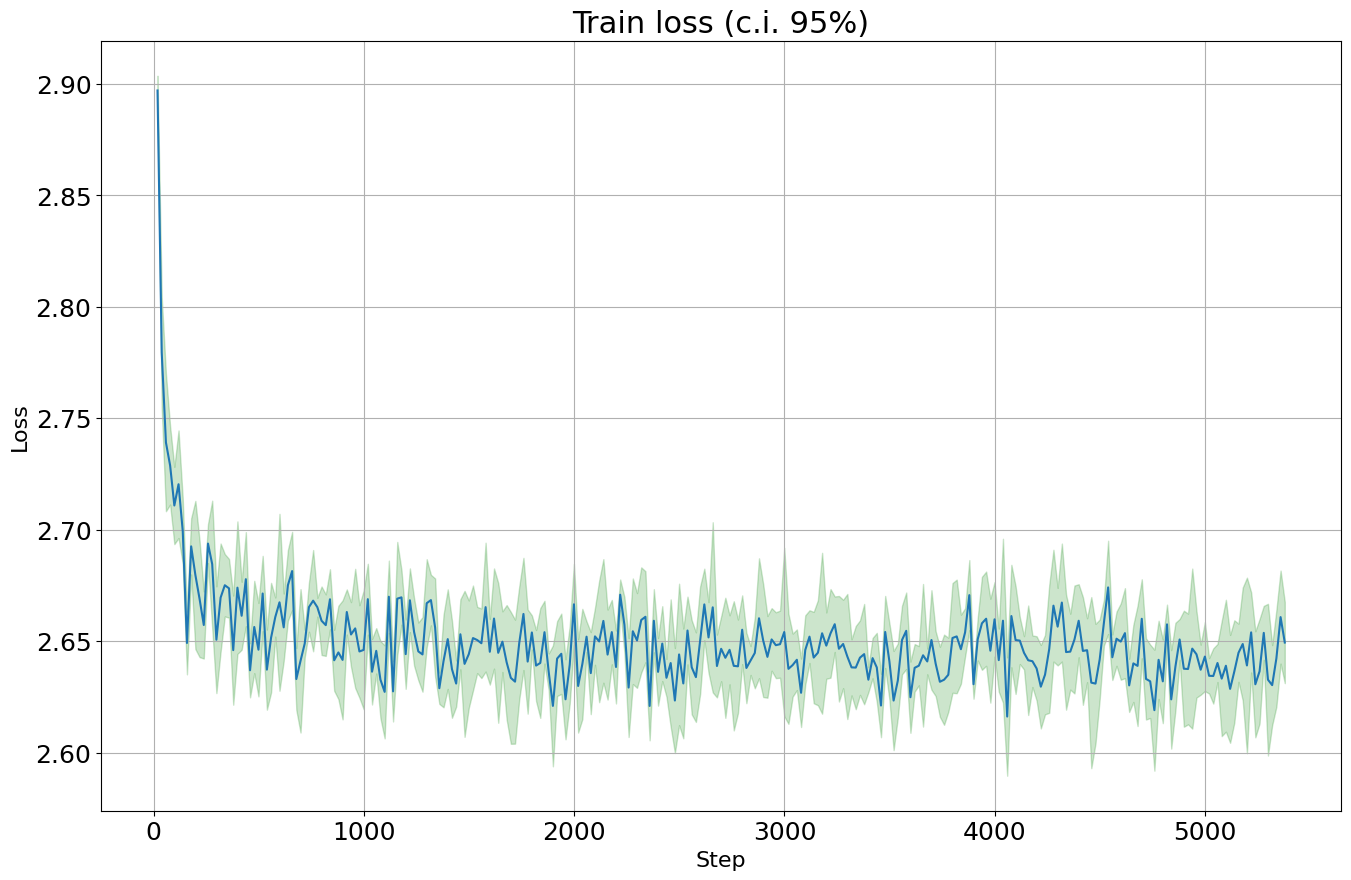

In [71]:
plt.figure(figsize=(16, 10))

plt.plot(res_train[0, :, 0], res_train_means, label='train loss')
plt.fill_between(
    res_train[0, :, 0],
    res_train_lower_bounder,
    res_train_upper_bounder,
    alpha=.2,
    color='green'
)
plt.grid('on')
plt.title('Train loss (c.i. 95%)', fontsize=22)
plt.xlabel('Step', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
plt.show();

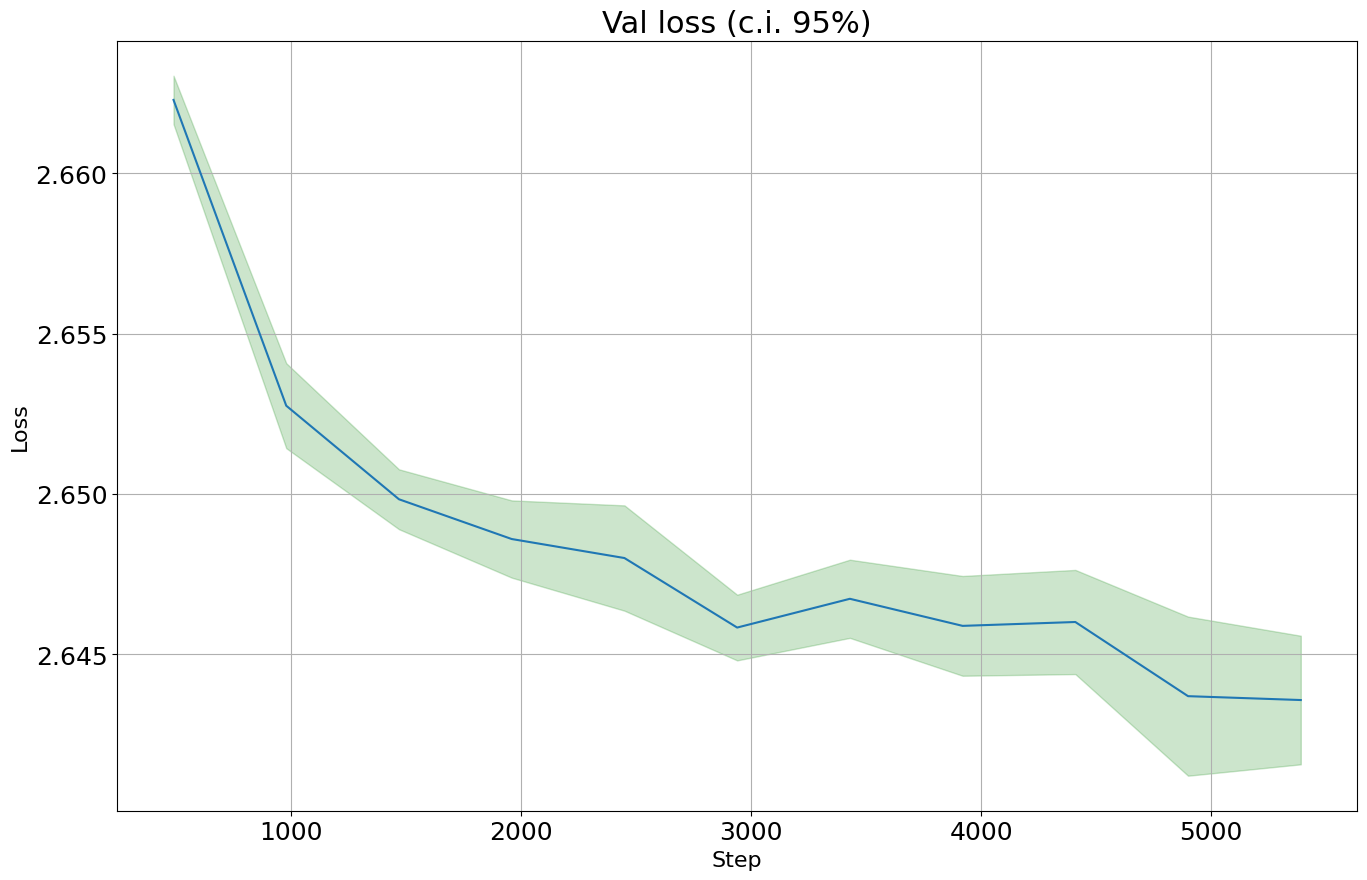

In [72]:
plt.figure(figsize=(16, 10))

plt.plot(res_val[0, :, 0], res_val_means, label='train loss')
plt.fill_between(
    res_val[0, :, 0],
    res_val_lower_bounder,
    res_val_upper_bounder,
    alpha=.2,
    color='green'
)
plt.grid('on')
plt.title('Val loss (c.i. 95%)', fontsize=22)
plt.xlabel('Step', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
plt.show();